## DecisionTree - playtennis

#### 의사결정 트리를 이용한 데이터 분석
- DecisionTree: 분류, 회귀에서 사용
- 범주형 변수일 때 사용(남여, 혈액형)(여자면 왼 아니면 오)
- 연속셩 변수일 때 회귀 트리로 사용(x보다 크면 왼, 작으면 오)

#### 어떤 것을 맨 먼저 파악하는 게 가지치기가 좋을까? 하는 지표들
- 지니 지수: 같은 종류 많을 수록 값 적음. 0.1... / 값 클수록 데이터끼리 다름. 0.7... : 같은 종류 많은 걸로 루트 정하면 좋다~
- 엔트로피 지수: 데이터 집합의 혼잡도. 작으면 잘 분류된 것
- 정보 이득: 값 클수록 정보 이득이 크다. 선택한 속성이 분류하기 좋다.

#### 적용
- 지니 지수가 가장 작은 Temperture를 루트로 정한다.(먼저 분리 속성으로 정한다.)

In [3]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # 의사결정 트리
from sklearn import tree

from IPython.display import Image

import pandas as pd
import numpy as np
#get_ipython().system('pip install pydotplus')
import pydotplus
import os
#pydotplus 설치 
#anaconda prompt 를 관리자 권한으로 실행
#conda install -c conda-forge pydotplus

In [4]:
tennis_data = pd.read_csv('/Users/min0/Documents/Documents/school/4-1/빅데이터/자료/week10/playtennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [5]:
# 범주형 변수 변경
# String 데이터를 숫자로 인코딩
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 7)

tennis_data.Wind = tennis_data.Wind.replace('Weak', 8)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 11)

tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [6]:
# 숫자니까 넘파이 배열로 바꾸자~~ 편하게편하게~~ 컬럼은 저렇게 지정~ 엥 근데 컬럼 안 줘도 되는데 왜 주는지는 교수님도 ㅁㄹ
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))
print(X) # Array of int64
print(y) # Array of int64

[[0 3 6 8]
 [0 3 6 9]
 [1 3 6 8]
 [2 4 6 8]
 [2 5 7 8]
 [2 5 7 9]
 [1 5 7 9]
 [0 4 6 8]
 [0 5 7 8]
 [2 4 7 8]
 [0 4 7 9]
 [1 4 6 9]
 [1 3 7 8]
 [2 4 6 9]]
[[10]
 [10]
 [11]
 [11]
 [11]
 [10]
 [11]
 [10]
 [11]
 [11]
 [11]
 [11]
 [11]
 [10]]


In [7]:
# 학습, 테스트 데이터로 나누기
# train, test 비율은 default=0.25 로 랜덤하게 선택됨 => 아래 링크 참조.
# http://blog.naver.com/PostView.nhn?blogId=siniphia&logNo=221396370872
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train)
print(X_test)
# 모두 Array of int64

[[2 4 6 8]
 [2 4 6 9]
 [2 4 7 8]
 [1 4 6 9]
 [1 5 7 9]
 [0 4 7 9]
 [2 5 7 9]
 [0 4 6 8]
 [0 3 6 8]
 [1 3 7 8]]
[[2 5 7 8]
 [0 3 6 9]
 [1 3 6 8]
 [0 5 7 8]]


In [8]:
# 모델 생성
dt_clf = DecisionTreeClassifier()
# 모델 학습
dt_clf = dt_clf.fit(X_train, y_train)
# 예측하기
dt_prediction = dt_clf.predict(X_test)
print("예측 값")
print(dt_prediction)
print("\n\n혼동행렬")
print(confusion_matrix(y_test, dt_prediction))
# 2개는 잘 예측, 2개는 테니스 치는 날 아닌데 맞다고 한 거
print("\n\n정확도 이런 거")
print(classification_report(y_test, dt_prediction))

예측 값
[11 10 11 11]


혼동행렬
[[1 0]
 [0 3]]


정확도 이런 거
              precision    recall  f1-score   support

          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [9]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]
target_name = np.array(['Play No', 'Play Yes'])

dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

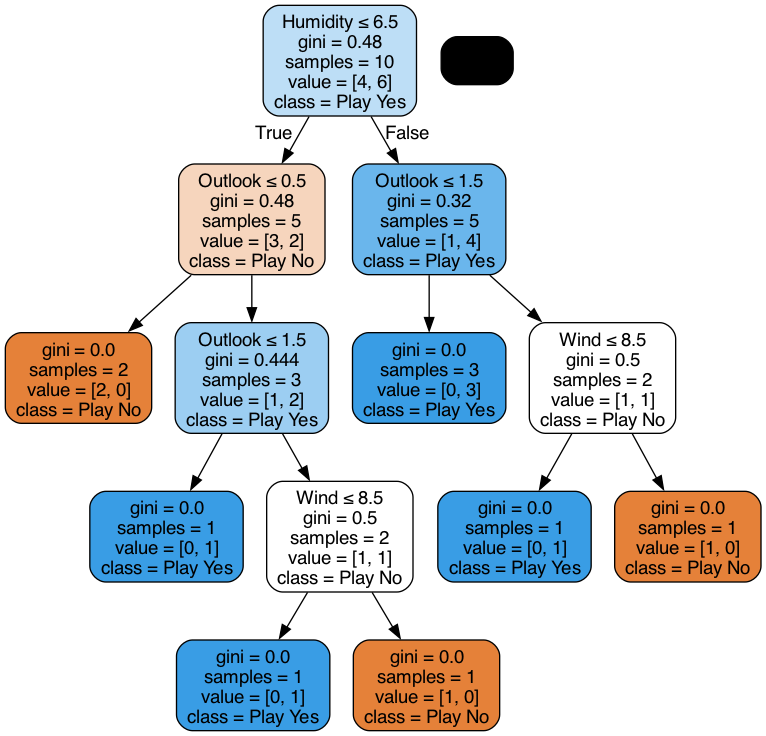

In [10]:
# graphviz 설치 : https://graphviz.org/download/
#os.environ['PATH'] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

# 다음 명령어는 따로 실행해본다.
#graphviz.Source(dt_graph)
Image(dt_graph.create_png())